<a href="https://colab.research.google.com/github/shreya25bce11282-cpu/cognitive-fatigue-model/blob/main/notebooks/02_eda_cognitive_fatigue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 200
df = pd.DataFrame({
    "session_duration": np.random.randint(5, 120, n),
    "scroll_events": np.random.randint(20, 800, n),
    "interaction_density": np.random.uniform(1, 10, n),
    "late_night": np.random.choice([0,1], n),
    "notifications": np.random.randint(0, 30, n),
    "task_switches": np.random.randint(0, 20, n)
})

df["fatigue_score"] = (
    0.04 * df["session_duration"]
    + 0.002 * df["scroll_events"]
    + 0.6 * df["interaction_density"]
    + 1.5 * df["late_night"]
    + 0.3 * df["notifications"]
    + 0.4 * df["task_switches"]
    + np.random.normal(0, 1, n)
)

df.head()


,session_duration,scroll_events,interaction_density,late_night,notifications,task_switches,fatigue_score
0,107,262,9.233780,1,29,9,24.787622
1,56,105,4.331428,0,0,2,7.413562
2,97,597,1.139110,0,16,8,14.962436
3,19,701,9.354867,1,7,12,16.847345
4,111,576,4.853657,1,1,17,16.474323


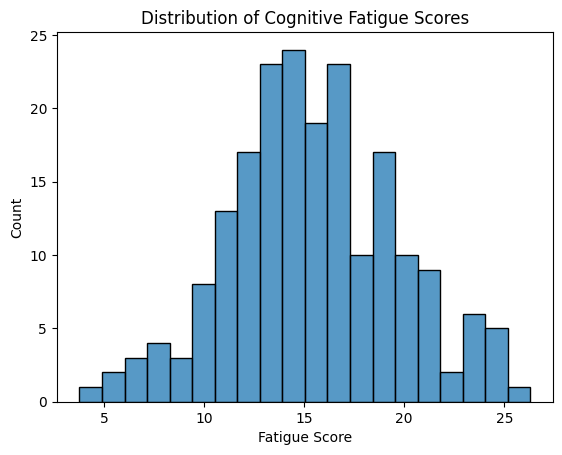

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["fatigue_score"], bins=20)
plt.title("Distribution of Cognitive Fatigue Scores")
plt.xlabel("Fatigue Score")
plt.show()


The fatigue scores show a roughly continuous distribution, suggesting that cognitive fatigue varies gradually rather than as a binary state. This supports modeling fatigue as a regression problem rather than classification

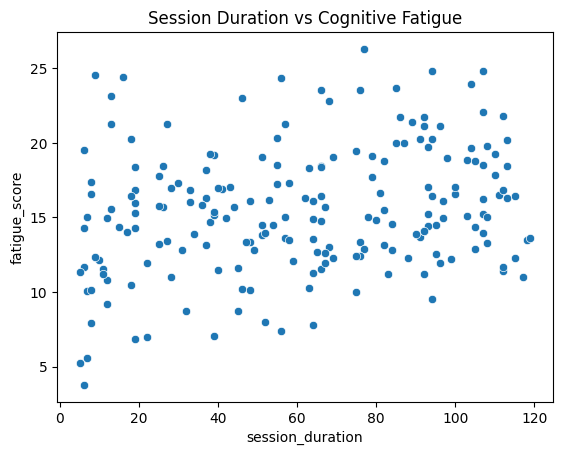

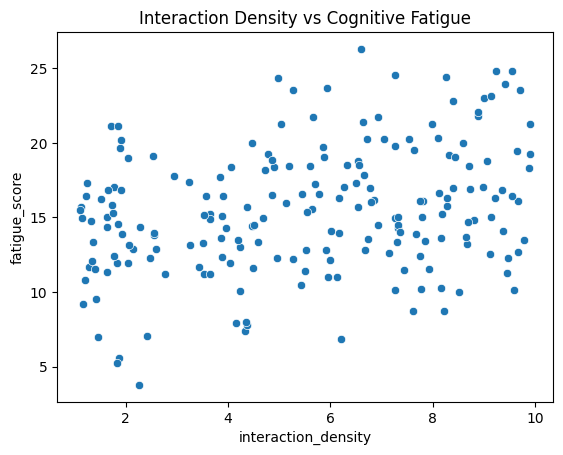

In [9]:
sns.scatterplot(x="session_duration", y="fatigue_score", data=df)
plt.title("Session Duration vs Cognitive Fatigue")
plt.show()
sns.scatterplot(x="interaction_density", y="fatigue_score", data=df)
plt.title("Interaction Density vs Cognitive Fatigue")
plt.show()


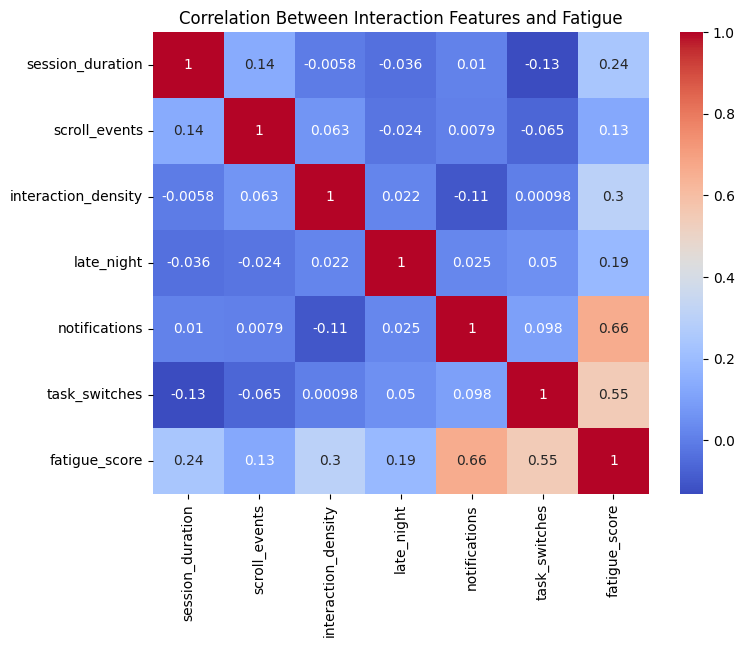

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Interaction Features and Fatigue")
plt.show()


The correlation analysis shows that interaction density and late-night usage have the strongest positive relationship with cognitive fatigue. This aligns with cognitive load theory, which predicts that sustained attention and frequent task switching overload working memory, leading to mental exhaustion.